In [1]:
import pandas as pd
import glob

In [3]:
data_list = glob.glob('*.xlsx')
print(data_list)

['capital_market.xlsx', 'pop.xlsx', 'pop_lofor.xlsx', 'traditional_market.xlsx']


In [54]:
data = pd.read_excel(data_list[2])
data.head(3)

,언어명,시군구명,시도명,관광지명,Full Address,Latitude,Longitude,웹사이트,KTO카테고리대분류명,KTO카테고리중분류명,KTO카테고리소분류명,방문자수
0,국어권,중구,서울특별시,동대문디자인플라자(DDP),중구 서울특별시 동대문디자인플라자(DDP),37.566526,127.009224,https://korean.visitkorea.or.kr/detail/ms_deta...,인문(문화/예술/역사),산업관광지,기타,20851.0
1,국어권,성동구,서울특별시,서울숲,성동구 서울특별시 서울숲,37.544388,127.037442,https://korean.visitkorea.or.kr/detail/ms_deta...,자연,자연관광지,자연생태관광지,13032.0
2,국어권,종로구,서울특별시,익선동,종로구 서울특별시 익선동,37.574348,126.989706,https://korean.visitkorea.or.kr/detail/ms_deta...,인문(문화/예술/역사),체험관광지,이색체험,12833.0


In [51]:
data = pd.read_excel(data_list[3])
data.head(3)

,시장,개설년도,주소,Latitude,Longitude,개설주기,소유관리,시장크기,시장형태,정기휴일,...,노점,노점상인,기타,총상인,전체점포수,조직형태,회원수,상인회 상근직원,회의실,교육장
0,광장시장,년,서울특별시 종로구 예지동 2-1,37.570283,126.998714,상설,법인시장,중형시장,인정시장,평일,...,20.0,20.0,0.0,500.0,320.0,(전통시장 특별법상) 시군구청 등록 상인회,280 명가입,1 명,있음,있음
1,세종마을음식문화거리,년,서울특별시 종로구 체부동 57,37.576577,126.971747,상설,개인시장,중형시장,상점가,모름/ 무응답,...,0.0,0.0,0.0,308.0,109.0,(전통시장 특별법상) 시군구청 등록 상인회,106 명가입,1 명,있음,있음
2,대일상가(낙원지하상가),년,서울특별시 종로구 낙원동 288 낙원상가 지하1층,37.572666,126.987808,상설,공동시장,소형시장,지하도상점가,주말,...,0.0,0.0,17.0,51.0,95.0,(유통산업발전법상) 상점가진흥조합,0 명가입,0 명,없음,없음


In [28]:
df = data.copy()
df = df[['Latitude','Longitude','시도','종류']]

In [19]:
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer



In [35]:
encoder = LabelEncoder()
df['시도'] = encoder.fit_transform(df['시도'])
df['종류'] = encoder.fit_transform(df['종류'])

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [47]:
from sklearn.cluster import KMeans


distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

C:\Users\juyeo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\juyeo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\juyeo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\juyeo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

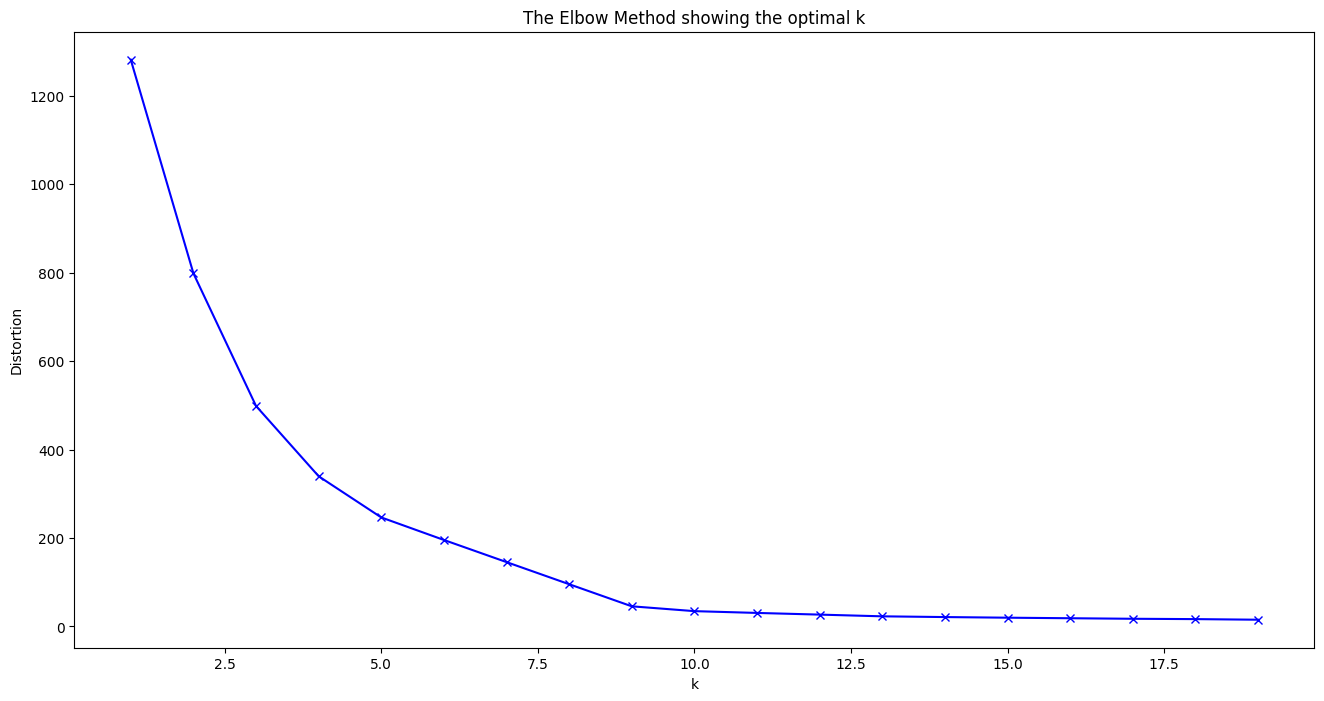

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()